In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import itertools
import numpy as np
import utils
import copy

from collections import defaultdict as ddict
from sklearn.metrics import confusion_matrix, f1_score
from matplotlib import pyplot as plt
from random import choices

In [55]:
sd_path = "../scores_dicts/abs_ours.pkl"
sd = utils.get_pickle(sd_path)

In [61]:
sd_path = "../scores_dicts/ext_ours.pkl"
sd = utils.get_pickle(sd_path)

# To analyze mix of ext and abs summaries, load both and merge

In [64]:
sd_abs_path = "../scores_dicts/abs_ours.pkl"
sd_ext_path = "../scores_dicts/ext_ours.pkl"
sd_abs = utils.get_pickle(sd_abs_path)
sd_ext = utils.get_pickle(sd_ext_path)
sd = copy.deepcopy(sd_abs)
for doc_id in sd:
    isd_sota_ext = sd_ext[doc_id]
    # isd_sota_ext['system_summaries']['bart_out_ext.txt'] = isd_sota_ext['system_summaries']['bart_out.txt']
    sd[doc_id]['system_summaries'].update(isd_sota_ext['system_summaries'])

# Data exploration

In [65]:
sd.keys()
len(sd)

dict_keys([52, 2, 23, 62, 6, 92, 73, 47, 86, 32, 67, 42, 36, 3, 50, 35, 17, 45, 16, 48, 95, 91, 89, 85, 74, 28, 49, 58, 12, 33, 14, 9, 8, 29, 43, 39, 38, 84, 57, 31, 21, 71, 15, 24, 78, 5, 90, 87, 51, 40, 1, 46, 66, 56, 7, 88, 72, 77, 34, 68, 26, 64, 18, 76, 30, 80, 61, 99, 79, 41, 27, 94, 22, 4, 82, 0, 10, 37, 25, 60, 70, 13, 19, 75, 69, 54, 65, 81, 98, 11, 55, 44, 59, 20, 83, 96, 97, 93, 53, 63])

100

### print score ranges

In [66]:
utils.print_score_ranges(sd)

                                                     min    25-perc     median    75-perc        max       mean
---------------------------------------------  ---------  ---------  ---------  ---------  ---------  ---------
bert_f_score                                   -0.351825   0.187762   0.274291   0.354471   0.932561   0.272637
bert_precision_score                           -0.254846   0.143861   0.232485   0.328865   0.943010   0.239075
bert_recall_score                              -0.459320   0.209174   0.308070   0.401256   0.921930   0.305628
js-2                                           -0.693147  -0.607497  -0.556299  -0.499285  -0.120117  -0.545432
litepyramid_recall                              0.000000   0.333333   0.454545   0.600000   1.000000   0.461623
mover_score                                     0.008218   0.222983   0.274517   0.333752   0.754240   0.282092
ours_big_patent_sent_delete                     0.241618   0.729438   0.822597   0.888275   0.955661   0

## how many summaries per document?

In [67]:
print(np.mean([len(d['system_summaries']) for d in sd.values()]))

25.0


In [59]:
len(sd)

100

## what metrics found for each document?

In [42]:
mlist = utils.get_metrics_list(sd)
mlist

['bert_f_score',
 'bert_precision_score',
 'bert_recall_score',
 'js-2',
 'litepyramid_recall',
 'mover_score',
 'ours_big_patent_sent_delete',
 'ours_big_patent_sent_replace',
 'ours_billsum_sent_delete',
 'ours_billsum_sent_replace',
 'ours_cnn_dailymail_sent_delete',
 'ours_cnn_dailymail_sent_replace',
 'ours_scientific_papers_sent_delete',
 'ours_scientific_papers_sent_replace_init_bert',
 'rouge_1_f_score',
 'rouge_1_precision',
 'rouge_1_recall',
 'rouge_2_f_score',
 'rouge_2_precision',
 'rouge_2_recall',
 'rouge_l_f_score',
 'rouge_l_precision',
 'rouge_l_recall']

## Filter out some metrics if reqd

In [68]:
mlist = ['bert_recall_score',  'ours_big_patent_sent_delete',
    #'ours_big_patent_sent_replace',
    'ours_billsum_sent_delete',
    #'ours_billsum_sent_replace',
    'ours_cnn_dailymail_sent_delete',
    # 'ours_cnn_dailymail_sent_replace',
    'ours_scientific_papers_sent_delete', 
    'rouge_l_recall',
    'mover_score',
    'js-2',
    # 'ours_scientific_papers_sent_replace_init_bert'#, 'mover_score', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2'
    'litepyramid_recall']

# Write to william's test format - Exp I
The below lines writes our data in the appropriate format for william's test. To run william's test see https://github.com/ygraham/nlp-williams

In [34]:
W_DATAPATH = "../williams_test_data/"
human_scores_fp = W_DATAPATH + 'abs_human_scores_100_docs_15_sys_clean.tsv'
metric_scores_fp = W_DATAPATH + 'abs_metric_scores_100_docs_15_sys_clean.tsv'

In [29]:
header = 'METRIC\tLP\tTESTSET\tSYSTEM\tSCORE'

In [44]:
systems = utils.get_system_level_scores(sd, mlist, agg='mean')
len(systems)
systems

14

defaultdict(<function utils.get_system_level_scores.<locals>.<lambda>()>,
            {'presumm_out_trans_abs.txt': defaultdict(list,
                         {'bert_recall_score': 0.23639445294509642,
                          'ours_big_patent_sent_delete': 0.8120554723,
                          'ours_billsum_sent_delete': 0.7996970487,
                          'ours_cnn_dailymail_sent_delete': 0.7900268529999999,
                          'ours_scientific_papers_sent_delete': 0.5675817706,
                          'rouge_l_recall': 0.43200049999999995,
                          'mover_score': 0.2514619151726886,
                          'js-2': -0.5748483871399386,
                          'litepyramid_recall': 0.37413331113331116}),
             'two_stage_rl_out.txt': defaultdict(list,
                         {'bert_recall_score': 0.302131678191945,
                          'ours_big_patent_sent_delete': 0.7490648183999999,
                          'ours_billsum_sent_delete

In [37]:
with open(human_scores_fp, 'w') as f:
    f.write(header + '\n')
    for sys_name in systems:
        _ = f.write(f"HUMAN\ten-en\tcnndm\t{sys_name}\t{systems[sys_name]['litepyramid_recall']}\n")

31

In [38]:
with open(metric_scores_fp, 'w') as f:
    f.write(header + '\n')
    for m in mlist:
        if m == 'litepyramid_recall':
            continue
        for sys_name in systems:
            _ = f.write(f"{m}\ten-en\tcnndm\t{sys_name}\t{systems[sys_name][m]}\n")

31

# System level analysis - Exp II

litepyramid_recall_bert_recall_score
litepyramid_recall_ours_big_patent_sent_delete
litepyramid_recall_ours_billsum_sent_delete
litepyramid_recall_ours_cnn_dailymail_sent_delete
litepyramid_recall_ours_scientific_papers_sent_delete
litepyramid_recall_rouge_l_recall
litepyramid_recall_mover_score
litepyramid_recall_js-2
0.33278170130236623
0.5189809292106612
0.4291028721737522
0.5995745934439858
0.757297473935806
0.6691213700654125
0.011714445572992616
0.1287485142568617


Text(0.5, 0, 'top k systems according to litepyramid_recall')

Text(0, 0.5, 'pearson correlation between different metric pairs')

(-1.0, 1.0)

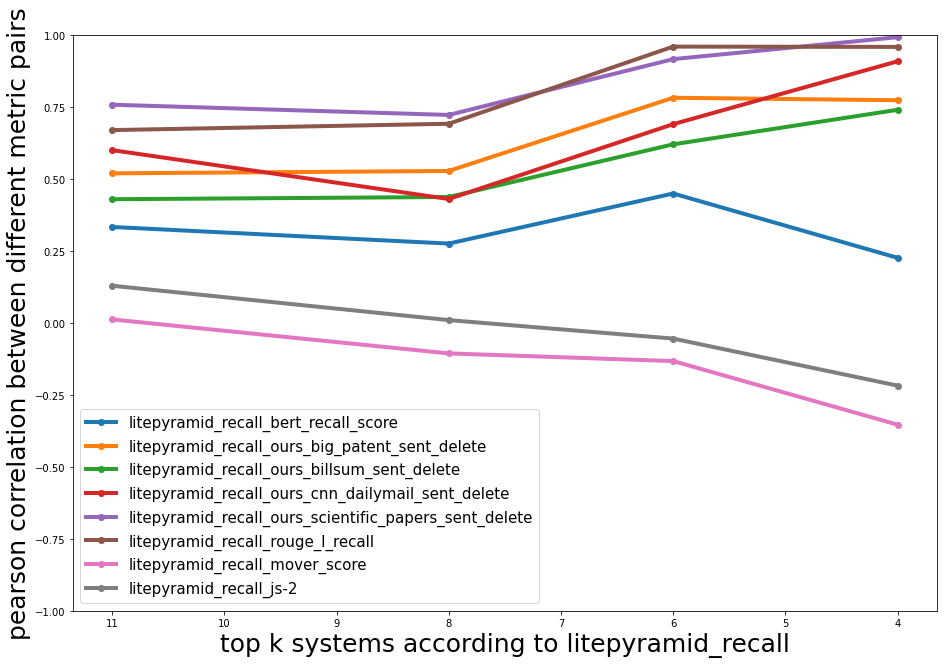

In [48]:
# plot k vs disagreements
# kvalues = [14, 12, 10, 8, 6, 4]
kvalues = [11, 8, 6, 4]
# kvalues = [25, 20, 16, 12, 8, 6, 4]
all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
systems = utils.get_system_level_scores(sd, mlist, agg='mean')
sorting_metric = 'litepyramid_recall'
correlation_method = 'pearson'

y = ddict(list)
for k in kvalues:
    top_ksystems = utils.get_topk(systems, k, metric=sorting_metric)
    corr, pval = utils.get_correlation(top_ksystems, metric_pairs=all_pairs, method=correlation_method)
    for key in corr:
        y[key].append(corr[key])
        
data = {
    'x': kvalues,
    **y,
}
labels = list(y.keys())
for label in labels:
    print (label)

ax = plt.axes([0, 0, 2, 2])
lines = []
for label in labels:
    lines.append(ax.plot('x', label, data=data, linewidth=4.0, marker='o',
                         linestyle='solid' if 'pyramid' in label else None))
    print(data[label][0])
plt.gca().invert_xaxis()
ax.legend(prop={'size': 15})
ax.set_xlabel(f"top k systems according to {sorting_metric}", fontsize=25)
ax.set_ylabel(f"{correlation_method} correlation between different metric pairs", fontsize=25)
plt.ylim(-1, 1)

# Other correlation

In [69]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
level="pool"
for pair in all_pairs: print(pair)
for pair in all_pairs:
    for method in [pearsonr, spearmanr, kendalltau]:
        corr = 0
        if level == "pool":
            x = []
            y = []
            for doc_id in sd:
                for sys_name, sys in sd[doc_id]["system_summaries"].items():
                    x.append(sys["scores"][pair[0]])
                    y.append(sys["scores"][pair[1]])
            corr = method(x, y)[0]
        elif level == "summary":
            for doc_id in sd:
                x = [sys["scores"][pair[0]] for sys_name, sys in sd[doc_id]["system_summaries"].items()]
                y = [sys["scores"][pair[1]] for sys_name, sys in sd[doc_id]["system_summaries"].items()]
                corr += method(x, y)[0]
            corr /= len(sd)
        elif level == 'system':
            x = [scores[pair[0]] for sys_name, scores in systems.items()]
            y = [scores[pair[1]] for sys_name, scores in systems.items()]
            corr = method(x, y)[0]
        else:
            print("???")
            assert(False)
        print("%.4f" % corr, end=" ")
    
    print("")

('litepyramid_recall', 'bert_recall_score')
('litepyramid_recall', 'ours_big_patent_sent_delete')
('litepyramid_recall', 'ours_billsum_sent_delete')
('litepyramid_recall', 'ours_cnn_dailymail_sent_delete')
('litepyramid_recall', 'ours_scientific_papers_sent_delete')
('litepyramid_recall', 'rouge_l_recall')
('litepyramid_recall', 'mover_score')
('litepyramid_recall', 'js-2')
0.5394 0.5208 0.3742 
0.2727 0.2328 0.1579 
0.1869 0.1774 0.1209 
0.1554 0.1515 0.1036 
0.1844 0.1634 0.1117 
0.5442 0.5276 0.3787 
0.4270 0.4013 0.2838 
0.4682 0.4629 0.3287 


# Bootstrap Resampling - Exp III

In [21]:
systems = utils.get_system_level_scores(sd, mlist, agg='none')
sys_names = list(systems.keys())
all_system_pairs = list(itertools.combinations(sys_names, 2))

In [24]:
def get_predictions_br(system_pairs, systems, metric):
    preds = {}
    for pair in system_pairs:
        sys1 = systems[pair[0]][metric]
        sys2 = systems[pair[1]][metric]
        n = len(sys1)
        points = [i for i in range(0, n)]
        is_better = 0
        N = 1000
        for i in range(N):
            sample = choices(points, k=n)
            sys1_ = [sys1[p] for p in sample]
            sys2_ = [sys2[p] for p in sample]
            if np.mean(sys1_) > np.mean(sys2_):
                is_better += 1
                
        if is_better/N >= 0.95:
            preds[pair] = 0 # pair[0] is better
        elif is_better/N <= 0.05:
            preds[pair] = 1 # pair[1] is better
        else:
            preds[pair] = 2 # can't say
    return preds

In [23]:
human_judgements = get_predictions_br(all_system_pairs, systems, 'litepyramid_recall')

In [21]:
y_true = [human_judgements[pair] for pair in all_system_pairs]
metrics = mlist
for metric in metrics:
    metric_predictions = get_predictions_br(all_system_pairs, systems, metric)
    
    y_pred = [metric_predictions[pair] for pair in all_system_pairs]
#     print('confusion metrics ', metric)
    print(confusion_matrix(y_true, y_pred))
    print(metric, f1_score(y_true, y_pred, average='weighted'))

[[16  2  7]
 [ 1 39  3]
 [ 6 15 16]]
bert_recall_score 0.6603724318010031
[[18  2  5]
 [ 1 35  7]
 [10 10 17]]
mover_score 0.6587782587782587
[[21  0  4]
 [ 0 33 10]
 [10  8 19]]
rouge_1_recall 0.6916326530612246
[[21  0  4]
 [ 0 36  7]
 [ 4  4 29]]
rouge_2_recall 0.8206793779943522
[[21  1  3]
 [ 0 34  9]
 [ 9  9 19]]
rouge_l_recall 0.6988245245851735
[[20  0  5]
 [ 1 33  9]
 [ 8  6 23]]
js-2 0.7250311868198047
[[24  0  1]
 [ 0 41  2]
 [ 0  1 36]]
litepyramid_recall 0.9621407660808685


# Summary level analysis - Exp IV

In [25]:
np.set_printoptions(precision=4)

In [26]:
metrics = mlist
utils.print_ktau_matrix(metrics, percentile=[(0, 100)], sd=sd, cutoff_metric='litepyramid_recall', y_type='ktau')

['bert_recall_score', 'mover_score', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2', 'litepyramid_recall']
[[0.     0.5434 0.5811 0.5996 0.58   0.5129 0.4684]]

[[0.     0.     0.4774 0.5562 0.4774 0.5888 0.436 ]]

[[0.     0.     0.     0.682  0.8626 0.5067 0.4891]]

[[0.     0.     0.     0.     0.7006 0.7258 0.486 ]]

[[0.     0.     0.     0.     0.     0.5154 0.4871]]

[[0.     0.     0.     0.     0.     0.     0.4255]]

[[0. 0. 0. 0. 0. 0. 0.]]

total 476/2100.0 = 22.666666666666668% values ignored


[0.46838622087890563,
 0.43599197955352864,
 0.48913594431561247,
 0.4859542610414608,
 0.4870908341119741,
 0.4254850921291276]